# TMDB Movie Data Analytics

## MACHINE LEARNING MODELS

### Importing necessary libraries

In [4]:
import numpy as np                     
import pandas as pd                   
import matplotlib.pyplot as plt        
import seaborn as sns 

### Reading the clean datafiles

In [5]:
m_df = pd.read_csv('cleaned_movie_df.csv')
genres_df = pd.read_csv('genres.csv')
keywords_df = pd.read_csv('keywords.csv')
production_companies_df = pd.read_csv('production_companies.csv')
production_countries_df = pd.read_csv('production_countries.csv')
cast_df = pd.read_csv('cast.csv')
crew_df = pd.read_csv('crew.csv')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 01. Revenue Prediction Model
### Multiple Linear Regression

#### Selecting Features & Target

In [13]:
X = m_df[['budget', 'runtime', 'vote_average', 'vote_count', 'popularity']]
y = m_df['revenue']

#### Splitting Data into Train & Test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training the Model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Predictions & Evaluation

In [16]:
y_pred = model.predict(X_test)  # Predicting revenue on test data

# Calculating model performance metrics:

# R2 Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.75
MAE: 46451512.66
RMSE: 80743724.62


#### Visualising Predictions vs Actual

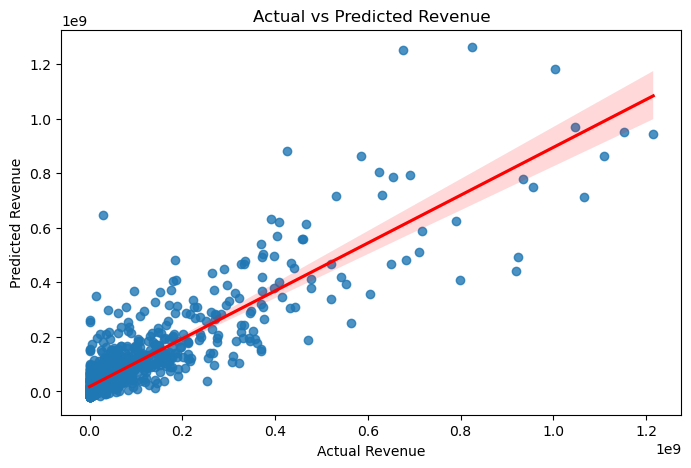

In [17]:
plt.figure(figsize=(8,5))
sns.regplot(x=y_test, y=y_pred, line_kws={'color':'red'})
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

## 02. Movie Rating Prediction
### Logistic Regression

#### Categorizing Movies into Good / Average / Poor based on Vote Average

In [18]:
# Mean of vote_average
M = m_df['vote_average'].mean()
M_half = M / 2
print(f'Mean of Vote Average = {M:.2f}')

# Categorizing movies into Good / Average / Poor
m_df['rating_category'] = pd.cut(
    m_df['vote_average'],
    bins=[-float('inf'), M_half, M, float('inf')],  # lower, mid, upper boundaries
    labels=['Poor', 'Average', 'Good']
)

# Checking the new column
print(m_df[['vote_average', 'rating_category']].head())


Mean of Vote Average = 6.09
   vote_average rating_category
0           7.2            Good
1           6.9            Good
2           6.3            Good
3           7.6            Good
4           6.1            Good


#### Feature Selection

In [19]:
# Selecting features
features = ['budget', 'runtime', 'popularity', 'vote_count']  
X = m_df[features]

# Target variable
y = m_df['rating_category']

print(y.unique())

['Good', 'Average', 'Poor']
Categories (3, object): ['Poor' < 'Average' < 'Good']


#### Splitting Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Scaling Features & Training the Model

In [21]:
from sklearn.linear_model import LogisticRegression

# Scaling numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training logistic regression (multinomial)
log_reg = LogisticRegression(multi_class='multinomial', max_iter=500)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

#### Evaluating the Model

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Calculating the Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

# Full classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.70
Precision: 0.68
Recall: 0.70
              precision    recall  f1-score   support

     Average       0.62      0.65      0.63       389
        Good       0.75      0.76      0.75       552
        Poor       0.00      0.00      0.00        20

    accuracy                           0.70       961
   macro avg       0.46      0.47      0.46       961
weighted avg       0.68      0.70      0.69       961



#### Visualising Confusion Matrix

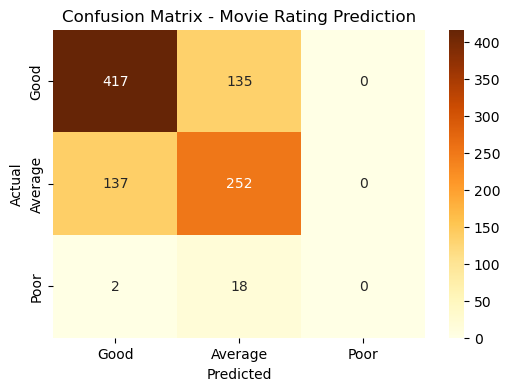

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['Good','Average','Poor'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=['Good','Average','Poor'],
            yticklabels=['Good','Average','Poor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Movie Rating Prediction')
plt.show()